**Introduction to Python for Data Science and Data Engineering**

Spark Components

  ![](https://jmp.sh/s/YzccOZReG7jdljk57jox)

  Spark Core (RDD API)-> Dataframe API -> Spark SQL/ Spark R API/ MLlib/ Structured Streaming API

# Spark Runtime Architecture
Driver / Cluster Manager / Workers / Executers
###  Driver    
- Responsible for planning and co-ordinating execution.
- Creates the SparkSession, the entry point to all spark applications.
- analyzes spark application and constructs DAG
- Schedules and distributes tasks to executors for execution
- monitors the progress of tasks and handles failures
- returns results to the client
###  Cluster Manager/Master
- Manages cluster resources and allocates them to driver
###  Workers
 - Nodes in the cluster that host ececutors.
###  Executors
- Processes on worker nodes that execute tasks assigned by the driver.
- Run on worker nodes in a spark cluster and host Tasks.
- Store intermediate and final resluts in memory or on disk.
- Interact with the driver for task co-ordination and data transfer


# The Spark DAG
 - Spark jobs are broken down in stages i.e group of tasks that can be run in parallel.
 - Computations flow in one direction through the stages
 - Stages never loop back, ensuring the job terminates
 - Stages are organized into a dependency graph for execution flow.

The Spark UI
 Visualising Spark applications

 Spark provides web user interfaces for monitoring and management including

###  Application UI
  - Per application SparkSession
  - Track Application progress and task execution
  - DAG visualization and stage details
  - Resource usage and performance metrics.

### Master UI
  - Per cluster
  - Worker node status and health and cluster-wide resource allocation
  - Shows all running applications and available resources.

# Spark Clusters in databricks

- **All purpose clusters** - interactive clusters that support notebooks , jobs, dashboards with auto termination
- **Job Cluster** - Clusters that stat when a job runs and terminate automatically upon completion, optimized for non interactive workloads.
- **SQL Warehouses** - Optimized clusters for SQL query performance with instant startup and auto-scaling to balance cost and performance.

In [64]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("MySparkSession") \
    .getOrCreate()

In [65]:
from pyspark.sql.functions import udf
from pyspark.sql.types import BooleanType
from pyspark.sql.functions import col

import math

# user defined function
def primeNumbercheck(myNum):
	if myNum==2:
		return True
	elif myNum%2==0 or myNum==1:
		return False
	x=int(math.sqrt(myNum))
	if x%2==0:
		strtno=x+1
	else:
		strtno=x
	for i in range(strtno,1,-2):
		if myNum%i==0:
			return False
	return True


In [66]:
#register the function primecheck as a
#User Defined Function (UDF) for use with Spark DataFrames
from pyspark.sql.functions import udf

@udf(returnType=BooleanType())
def primecheck(myNum):
    return primeNumbercheck(myNum)

In [93]:
#create dataframe with sample data 1000 records
df = spark.range(0,10000000)

print(type(df))

#Add a new column isPrime with boolean value as output
df = df.withColumn("isPrime", primecheck(df["id"]))

<class 'pyspark.sql.dataframe.DataFrame'>


In [94]:
#capture the result of only prime records
result = df.filter(df.isPrime==True)

In [86]:
# number of primes cache the result
# visible on spark UI /storage/
result.cache()

DataFrame[id: bigint, isPrime: boolean]

In [95]:
result.collect()

[Row(id=2, isPrime=True),
 Row(id=3, isPrime=True),
 Row(id=5, isPrime=True),
 Row(id=7, isPrime=True),
 Row(id=11, isPrime=True),
 Row(id=13, isPrime=True),
 Row(id=17, isPrime=True),
 Row(id=19, isPrime=True),
 Row(id=23, isPrime=True),
 Row(id=29, isPrime=True),
 Row(id=31, isPrime=True),
 Row(id=37, isPrime=True),
 Row(id=41, isPrime=True),
 Row(id=43, isPrime=True),
 Row(id=47, isPrime=True),
 Row(id=53, isPrime=True),
 Row(id=59, isPrime=True),
 Row(id=61, isPrime=True),
 Row(id=67, isPrime=True),
 Row(id=71, isPrime=True),
 Row(id=73, isPrime=True),
 Row(id=79, isPrime=True),
 Row(id=83, isPrime=True),
 Row(id=89, isPrime=True),
 Row(id=97, isPrime=True),
 Row(id=101, isPrime=True),
 Row(id=103, isPrime=True),
 Row(id=107, isPrime=True),
 Row(id=109, isPrime=True),
 Row(id=113, isPrime=True),
 Row(id=127, isPrime=True),
 Row(id=131, isPrime=True),
 Row(id=137, isPrime=True),
 Row(id=139, isPrime=True),
 Row(id=149, isPrime=True),
 Row(id=151, isPrime=True),
 Row(id=157, isPrime=

In [97]:
result.count()

664579

In [83]:
# Free up executor memeory by unpersisting cached objects
result.unpersist()

DataFrame[id: bigint, isPrime: boolean]

In [20]:
# install ngrok reverse proxy python wrapper
!pip install pyngrok
!pip install findspark

In [23]:
import findspark
findspark.init()
from pyngrok import ngrok
import os

In [28]:
ngrok.set_auth_token("Get your token from https://dashboard.ngrok.com/get-started/your-authtoken")

In [29]:
spark_ui_port = spark.conf.get("spark.ui.port")
ngrok_tunnel = ngrok.connect(spark_ui_port)
print(f"Spark UI URL: {ngrok_tunnel.public_url}")

Spark UI URL: https://95c5-34-16-236-147.ngrok-free.app


# DataFrames

* Dataframes are distributed collection of records aall with the same pre-defined structure   
* Built on Sparks core concepts but with structure , optimization and familar SQL like operations for data manipulation.
* DataFrames tack their schema and provide native support for many common SQL functions and relational operators like JOINs.
* DataFrames are evaluated as DAGs using lazy evaluation . Prepare the DAG as execute when data is requested.

* Can be created from JSON,CSV, Parquet, ORC,Text or Binary Files
* Delta Lake or other Table storage format directories.

## DataFrame API Optimization
- Adaptive Query Execution
- In-memory Columnar Storage
- Built in Statistics
- Catalyst Optimizer adn Photon (DataBricks)  

## DataFrame/ Query Planning
- When a DF is evaluated, the driver creates an optimzed execution plan throught a series of transformation
 Unresolved logical plan -> Analyzed Logical Plan -> Optimized logical Plan -> Physical Plan



#Columnar Storage


*   Organizes data by column enabling efficient scanning and analysis
*   Efficient for analytical workloads
*   Implemented in dataframe internal storage and in physical file encoding formats such as Parquet and ORC.



# DataFrameReader and DataFrameWriter

df = spark.read.format("format").option().load()

df = spark.read.csv("filelocation")
df = spark.read.parquet("filelocation")

-------------

df.write.format("format").mode("mode").save()

df.write.csv("filelocation")


In [98]:
#writing data onto a file
df.write.format("csv").mode("overwrite").save("prime_numbers.csv")

# Dataframe Schema

- Every DF has a define schema i.e structure and data types of all columns
- Can be inferred from data or explicitly specified
- self describing format like parquet include schema information
- df.printSchema() --> to print out the dataFrame schema
- DDL schema
    - ddl_schema = "name STRING NOT NULL, age INT, city STRING"
    - df = spark.read.csv("Filelocation",schema = ddl_schema)
    - df.printSchema()
- DataFrame Data Types
    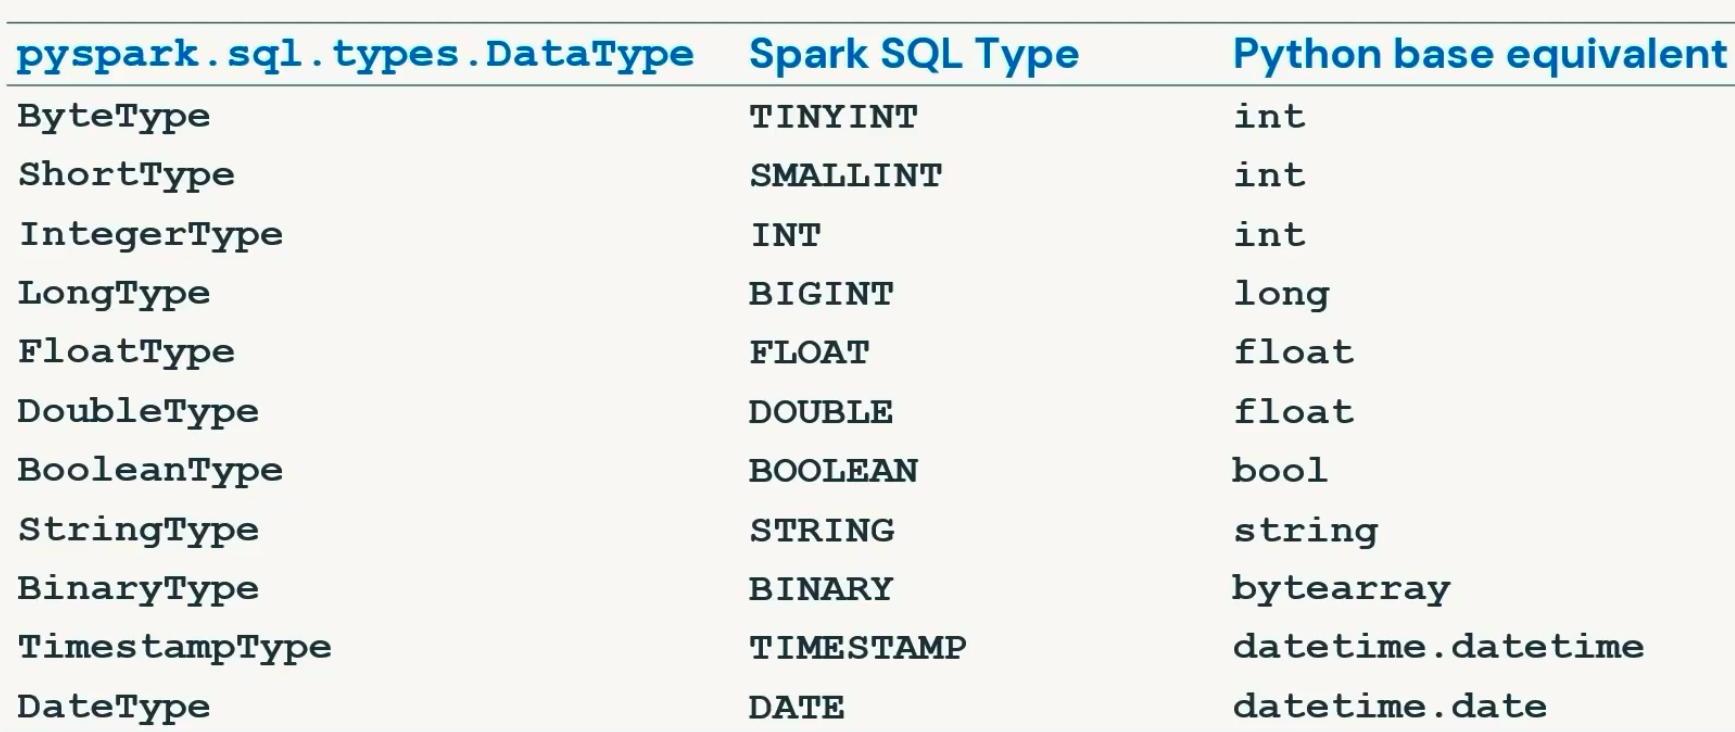


In [99]:
df.printSchema()

root
 |-- id: long (nullable = false)
 |-- isPrime: boolean (nullable = true)

